# Figure 4

Consider the family of unidirectional payment streams $\{ (\tau_n^\lambda, \Delta_n^\lambda)_{n \geq 1} \}_{\lambda > 0}$ described in Section 5.1.1.

## Fixed $\lambda$

The code for computing the minimal cost, optimal deposit and reset threshold for $\lambda = \tfrac{1}{20}$ is given below:

In [1]:
import numpy as np
from scipy.optimize import root
from dataclasses import dataclass
import matplotlib.pyplot as plt
import import_ipynb
import GeneralMethod  # Call functions from GeneralMethod without duplicating code

In [3]:
lam = 1/20

# Cumulative probability between two points when payments are exponential with mean 1/lam
def I(x,y):
    if x >= 0:
        return np.exp(-lam * x) - np.exp(-lam * y)
    elif y <= 0:
        return 0
    else:
        return 1 - np.exp(-lam * y)

In [5]:
params = GeneralMethod.PaymentParams(
    l_A = 0, 
    l_B = 300, 
    C = 1.0, 
    D = 2.0, 
    alpha = (1040 * lam) / (1040 * lam + 0.02),
    n = 1,
    I = I 
)

# Find the optimal cost vector
optimal_cost_vector = GeneralMethod.T_n(params, method='hybr')
print("Optimal cost starting at zero with l_A=0 and l_B=300:", optimal_cost_vector[0])

Optimal cost starting at zero with l_A=0 and l_B=300: 390.3998250876541


In [9]:
# 0 + 300 + 390.3998250876541 < 700
GeneralMethod.multi_level_search(params, 50, 700, 5, 20, unidirectional=True, symmetric=False, method='hybr')

Starting coarse search with step size: 50, l_max: 700
l_A = 0, l_B = 0, V_n = 2599.999999999345
l_A = 0, l_B = 50, V_n = 1640.746146723797
l_A = 0, l_B = 100, V_n = 1164.8563006290724
l_A = 0, l_B = 150, V_n = 917.817630973144
l_A = 0, l_B = 200, V_n = 787.5685200268439
l_A = 0, l_B = 250, V_n = 720.7032301122675
l_A = 0, l_B = 300, V_n = 690.3998250876541
l_A = 0, l_B = 350, V_n = 682.4831079282875
l_A = 0, l_B = 400, V_n = 688.9928296421737
l_A = 0, l_B = 450, V_n = 705.2629510847603
l_A = 0, l_B = 500, V_n = 728.3949359015439
l_A = 0, l_B = 550, V_n = 756.5199924797607
l_A = 0, l_B = 600, V_n = 788.3822690317882
l_A = 0, l_B = 650, V_n = 823.1109087917318
l_A = 0, l_B = 700, V_n = 860.0799268249107
Coarse search result: l_A = 0, l_B = 350, V = 682.4831079282875
Starting fine search with step size: 5 around the coarse minimum
l_A = 0, l_B = 330, V_n = 683.5650156262159
l_A = 0, l_B = 335, V_n = 683.061461558533
l_A = 0, l_B = 340, V_n = 682.7106002478249
l_A = 0, l_B = 345, V_n = 682

(0, 350, 682.4831079282875)

Therefore, the optimal channel deposits are $l_A^* = 0$ and $l_B^* = 350$. The minimal cost is $687$. And the reset threshold is $309$, as computed below.

In [15]:
params.l_A=0 # optimal l_A
params.l_B=350 # optimal l_B

optimal_cost_vector = GeneralMethod.T_n(params, method='hybr')

print("Reset threshold:", params.l_B - GeneralMethod.calculate_threshold_indices(optimal_cost_vector, params.C, params.D, params.l_A, params.l_B, params.n)[0] / (2 * params.n))

Reset threshold: 309.0


## Varying $\lambda$

Varying the mean payment amount $\tfrac{1}{\lambda}$ and repeating the above analysis yields the following table:

|      $\tfrac{1}{\lambda}$       |   Minimal cost   |  Optimal deposit  |  Reset threshold  |
|:--------------------------------:|:----------------:|:-----------------:|:------------------:|
|               1                  |       650        |        323        |        322        |
|              10                  |       670        |        340        |        317        |
|              20                  |       682        |        350        |        310        |
|              30                  |       684        |        348        |        299        |
|              40                  |       680        |        330        |        279        |
|              50                  |       668        |        297        |        248        |
|              60                  |       649        |        250        |        208        |
|              70                  |       625        |        195        |        163        |
|              80                  |       594        |        140        |        117        |
|              90                  |       558        |         87        |         74        |
|             100                  |       515        |         40        |         38        |



Spline interpolation allows us to fit a smooth curve through these points, which can then be used to estimate the minimal cost, optimal deposit and reset threshold at intermediate values.

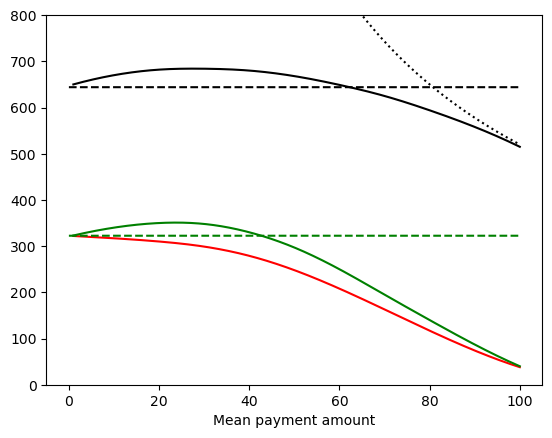

In [88]:
from scipy.interpolate import make_interp_spline

x_values=np.array([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

optimal_cost=np.array([650, 670, 682, 684, 680, 668, 649, 625, 594, 558, 515])
optimal_allocations=np.array([323, 340, 350, 348, 330, 297, 250, 195, 140, 87, 40])
reset_thresholds=np.array([322, 317, 310, 299, 279, 248, 208, 163, 117, 74, 38])

X_OC_Spline = make_interp_spline(x_values, optimal_cost)
X_OA_Spline = make_interp_spline(x_values, optimal_allocations)
X_RT_Spline = make_interp_spline(x_values, reset_thresholds)
X_ = np.linspace(x_values.min(), x_values.max(), 10000)
OC_ = X_OC_Spline(X_)
OA_ = X_OA_Spline(X_)
RT_ = X_RT_Spline(X_)
plt.plot(X_, OC_, color='black', label='Optimal cost') 
plt.plot(X_, RT_, color='red', label='Reset threshold')
plt.plot(X_, OA_, color='green', label='Optimal allocation')
x = np.linspace(0.01, 100, 10000)
plt.plot(x, 1040/(0.02 * x), color='black', linestyle='dotted') # cost paying on-chain
plt.plot(x, [322.5]*10000, color='green', linestyle='dashed') # Micropayment limit deposit
plt.plot(x, [644]*10000, color='black', linestyle='dashed') # Micropayment limit cost
plt.ylim(0, 800)
plt.xlabel('Mean payment amount')
plt.show()